## Project 1 Part 3: An Analysis on Commuter Trips and Business Offer Suggestions

### Preparation

#### Importing/Updating google-cloud-bigquery

In [3]:
!sudo /opt/conda/bin/conda install -c conda-forge google-cloud-bigquery google-cloud-bigquery-storage pandas pyarrow --yes

Solving environment: done

# All requested packages already installed.



In [4]:
%pip install google-cloud-bigquery

Note: you may need to restart the kernel to use updated packages.


#### Importing pandas, seaborn, and other necessary packages

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Commuter Trips + Recommendations

In order to demonstrate the relationship between commuter trips and timing, we can investigate more into the starting hour for trips and see the frequency of trips at each of those hours. 

Let us run the following query as a bq that will result in the csv file 'trips_by_hour.csv':
   
```sql
WITH start_end_hour_extracted AS (
SELECT *,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str,
       EXTRACT(HOUR FROM end_date) AS end_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM end_date) <= 5  OR EXTRACT(HOUR FROM end_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM end_date) >= 6 and EXTRACT(HOUR FROM end_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM end_date) >= 9 and EXTRACT(HOUR FROM end_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM end_date) >= 11 and EXTRACT(HOUR FROM end_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM end_date) >= 14 and EXTRACT(HOUR FROM end_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM end_date) >= 17 and EXTRACT(HOUR FROM end_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM end_date) >= 20 and EXTRACT(HOUR FROM end_date) <= 22 THEN "Evening"
           END AS end_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
)
SELECT start_hour,count(*) as trips_by_hour
FROM start_end_hour_extracted
GROUP by start_hour
ORDER by trips_by_hour DESC
```

<!-- Let's run the following query as a bq and save it as the csv file 'trips_by_hour.csv': 

WITH start_end_hour_extracted AS (
SELECT *,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str,
       EXTRACT(HOUR FROM end_date) AS end_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM end_date) <= 5  OR EXTRACT(HOUR FROM end_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM end_date) >= 6 and EXTRACT(HOUR FROM end_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM end_date) >= 9 and EXTRACT(HOUR FROM end_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM end_date) >= 11 and EXTRACT(HOUR FROM end_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM end_date) >= 14 and EXTRACT(HOUR FROM end_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM end_date) >= 17 and EXTRACT(HOUR FROM end_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM end_date) >= 20 and EXTRACT(HOUR FROM end_date) <= 22 THEN "Evening"
           END AS end_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
)
SELECT start_hour,count(*) as trips_by_hour
FROM start_end_hour_extracted
GROUP by start_hour
ORDER by trips_by_hour DESC -->

In [14]:
! bq query --use_legacy_sql=FALSE --format=csv 'WITH start_end_hour_extracted AS (SELECT *, EXTRACT(HOUR FROM start_date) AS start_hour, CASE  WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime" WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning" WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning" WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day" WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening" END AS start_hour_str, EXTRACT(HOUR FROM end_date) AS end_hour, CASE  WHEN EXTRACT(HOUR FROM end_date) <= 5  OR EXTRACT(HOUR FROM end_date) >= 23 THEN "Nightime" WHEN EXTRACT(HOUR FROM end_date) >= 6 and EXTRACT(HOUR FROM end_date) <= 8 THEN "Morning" WHEN EXTRACT(HOUR FROM end_date) >= 9 and EXTRACT(HOUR FROM end_date) <= 10 THEN "Mid Morning" WHEN EXTRACT(HOUR FROM end_date) >= 11 and EXTRACT(HOUR FROM end_date) <= 13 THEN "Mid Day" WHEN EXTRACT(HOUR FROM end_date) >= 14 and EXTRACT(HOUR FROM end_date) <= 16 THEN "Early Afternoon" WHEN EXTRACT(HOUR FROM end_date) >= 17 and EXTRACT(HOUR FROM end_date) <= 19 THEN "Afternoon" WHEN EXTRACT(HOUR FROM end_date) >= 20 and EXTRACT(HOUR FROM end_date) <= 22 THEN "Evening" END AS end_hour_str FROM `bigquery-public-data.san_francisco.bikeshare_trips`) SELECT start_hour,count(*) as trips_by_hour FROM start_end_hour_extracted GROUP by start_hour ORDER by trips_by_hour DESC' > trips_by_hour.csv

Waiting on bqjob_r29b8f0ee17e2a8a7_00000174e6704d40_1 ... (1s) Current status: DONE   


In [15]:
trips_by_hour = pd.read_csv('trips_by_hour.csv')
trips_by_hour

,start_hour,trips_by_hour
0,8,132464
1,17,126302
2,9,96118
3,16,88755
4,18,84569
5,7,67531
6,15,47626
7,12,46950
8,13,43714
9,10,42782


By having sorted the data by trips_by_hour in descending order, it appears that the hours 8, 17, 9, 16, and 18, corresponding to 8 am, 5 pm, 9 am, 4 pm, and 6 pm, respectively are the top 5 hours with the most trips associated with them. In the bar chart below, we see the highest bars at those times, and compared to the rest of the hours, there is a significant difference amongst the trip count. In the night time we see very few rides, but as it becomes early morning, we see the number of rides dramatically increase as it hits 7 am. In the late morning/early afternoon period the number of rides decrease, and then pick back up at around 4pm and 5 pm, followed by steady decline in rides. 

These times correspond with the standard work day that begins at 8 or 9 am and ends at 4pm or 5 pm. These are times where people are rushing to get to work and leave work, and therefore there is a higher likelihood of congestion and vehicles on the road at the time. In addition, it is highly likely that it is the same group of people who would be taking these trips every day of the work week. 

Text(0.5, 1.0, 'Starting Hour vs Total Number of Trips')

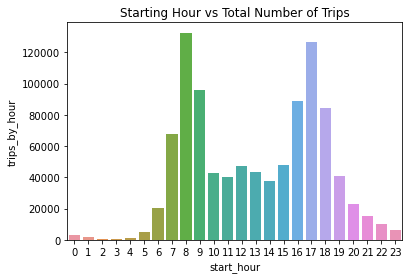

In [17]:
#Visualization of Starting Hour vs Total Number of Trips
sns.barplot(x="start_hour", y="trips_by_hour", data=trips_by_hour).set_title('Starting Hour vs Total Number of Trips')

Let us now look more into the days of the week and see how that corresponds to the number of trips, the type of trips, and the hours of the day. We would like to observe which days of the week has the most trips and which has the least trips.



Let us run the below query and save it as a csv file called 'dow_and_subscriber_counts.csv'

```sql
WITH start_day_extracted AS (
SELECT *,
     EXTRACT(DAYOFWEEK FROM start_date) AS start_dayofweek,
     CASE EXTRACT(DAYOFWEEK FROM start_date)
         WHEN 1 THEN "Sunday"
         WHEN 2 THEN "Monday"
         WHEN 3 THEN "Tuesday"
         WHEN 4 THEN "Wednesday"
         WHEN 5 THEN "Thursday"
         WHEN 6 THEN "Friday"
         WHEN 7 THEN "Saturday"
         END AS start_dayofweek_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
)
SELECT start_dayofweek, start_dayofweek_str, subscriber_type, count(*) as trips_by_day_of_week
FROM start_day_extracted
GROUP by start_dayofweek, start_dayofweek_str, subscriber_type
ORDER by start_dayofweek, start_dayofweek_str, subscriber_type ASC
```

In [20]:
! bq query --use_legacy_sql=FALSE --format=csv 'WITH start_day_extracted AS (SELECT *, EXTRACT(DAYOFWEEK FROM start_date) AS start_dayofweek, CASE EXTRACT(DAYOFWEEK FROM start_date) WHEN 1 THEN "Sunday" WHEN 2 THEN "Monday" WHEN 3 THEN "Tuesday" WHEN 4 THEN "Wednesday" WHEN 5 THEN "Thursday" WHEN 6 THEN "Friday" WHEN 7 THEN "Saturday" END AS start_dayofweek_str FROM `bigquery-public-data.san_francisco.bikeshare_trips`) SELECT start_dayofweek, start_dayofweek_str, subscriber_type, count(*) as trips_by_day_of_week FROM start_day_extracted GROUP by start_dayofweek, start_dayofweek_str, subscriber_type ORDER by start_dayofweek, start_dayofweek_str, subscriber_type ASC' > dow_and_subscriber_counts.csv  

Waiting on bqjob_r4db25e3bd4c24517_00000174e6793c86_1 ... (1s) Current status: DONE   


In [22]:
dow_and_subscriber_counts = pd.read_csv('dow_and_subscriber_counts.csv')
dow_and_subscriber_counts

,start_dayofweek,start_dayofweek_str,subscriber_type,trips_by_day_of_week
0,1,Sunday,Customer,25908
1,1,Sunday,Subscriber,25467
2,2,Monday,Customer,15142
3,2,Monday,Subscriber,154795
4,3,Tuesday,Customer,14737
5,3,Tuesday,Subscriber,169668
6,4,Wednesday,Customer,15237
7,4,Wednesday,Subscriber,165530
8,5,Thursday,Customer,16612
9,5,Thursday,Subscriber,160296


Text(0.5, 1.0, 'Number of Trips per Day by Subscriber Type')

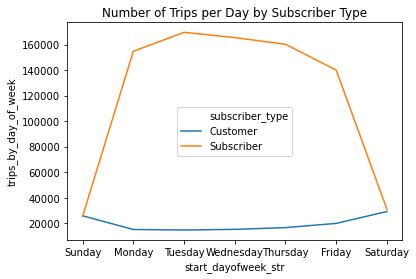

In [27]:
sns.lineplot(data=dow_and_subscriber_counts, x="start_dayofweek_str", y="trips_by_day_of_week", hue="subscriber_type", sort=False).set_title("Number of Trips per Day by Subscriber Type")

Based on the lineplots above, we notice that the on weekends, the customer trips and subscribers trip numbers are relatively the same, but over the weekdays, there is a stark difference between the number of trips for customers and subscribers. For customers, the number of trips on weekdays is only slightly less than the number of customer trips on weekends, but the number of subscriber trips skyrocket and are fairly consistent for every single weekday. We start to notice more ways we can further define what a commuter trip is, and we can incorporate the idea of a commuter trip occurring on a weekday and continuing on for other weekdays as well. 

In the next dataset and visualization, we will tie together the previous visualizations and start to see a connection between the starting hours and days of week. 

Let us run the below query and save it as a csv file called 'hours_and_dow.csv'

```sql
WITH hours_and_dow as (
SELECT *,
     EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
     CASE 
         WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
         ELSE "Weekday"
         END AS dow_weekday,
     EXTRACT(HOUR FROM start_date) AS start_hour
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY start_date ASC
)

select dow_weekday, start_hour, count(*) as trips_by_hr_day
from hours_and_dow 
group by dow_weekday,start_hour
order by trips_by_hr_day DESC
```

In [28]:
! bq query --use_legacy_sql=FALSE --format=csv 'WITH hours_and_dow as (SELECT *, EXTRACT(DAYOFWEEK FROM start_date) AS dow_int, CASE WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend" ELSE "Weekday" END AS dow_weekday, EXTRACT(HOUR FROM start_date) AS start_hour FROM `bigquery-public-data.san_francisco.bikeshare_trips` ORDER BY start_date ASC) select dow_weekday, start_hour, count(*) as trips_by_hr_day from hours_and_dow  group by dow_weekday,start_hour order by trips_by_hr_day DESC' > hours_and_dow.csv 

Waiting on bqjob_r5f9e05d02f7a6bbf_00000174e7100401_1 ... (2s) Current status: DONE   


In [29]:
hours_and_dow = pd.read_csv("hours_and_dow.csv")
hours_and_dow

,dow_weekday,start_hour,trips_by_hr_day
0,Weekday,8,128999
1,Weekday,17,118332
2,Weekday,9,90264
3,Weekday,16,79000
4,Weekday,18,78188
5,Weekday,7,65900
6,Weekday,15,37424
7,Weekday,19,36584
8,Weekday,12,36382
9,Weekday,10,34888


Text(0.5, 1.0, 'Number of Trips by Hour of Day and Type of Day')

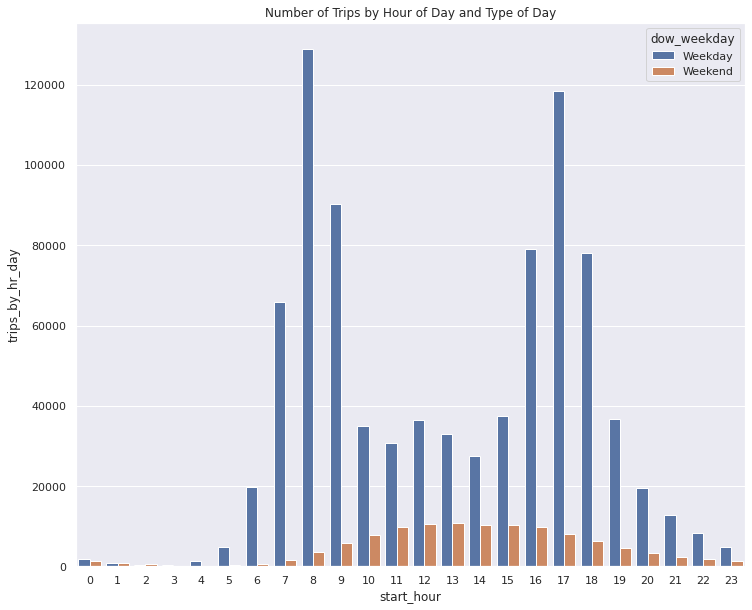

In [35]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(data=hours_and_dow, x="start_hour", y="trips_by_hr_day", hue="dow_weekday").set_title("Number of Trips by Hour of Day and Type of Day")

The visualization above resembles the first barchart of starting hours vs trips, and we see the overall trend being represented predominantly by the weekday trips. We can also infer that the majority of trips on weekdays are by subscribers, as they are the ones to commute to work regularly. So far, we can define commuter trips by its starting hours, mainly between 7am-9am or 4pm-6pm, and the days that it occurs, predominantly weekdays. 

Now let us see if the duration of the trip or whether or not the trip is a roundtrip can tell us more information. In addition, does the type of station that the trip starts and ends at significant? 

##### Duration

Generally speaking, commuter trips are ones that occur periodically but are also quick trips. Non commuter trips for this dataset would be those that are much longer, predominantly done by customers, and for the purpose of city exploration, tourism, or sightseeing, all of which are time consuming processes. The goal of a commuter trip is normally to get to one place to another in the quickest, most convenient way possible. With those assumptions about commuter trips being made, let's take a look at the relationship between trip duration. 

Let us run the below query and save it as a csv file called 'avg_duration_by_day_type.csv'

```sql
WITH weekday_weekend AS (
SELECT start_date, duration_sec,
     EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
     CASE EXTRACT(DAYOFWEEK FROM start_date)
         WHEN 1 THEN "Sunday"
         WHEN 2 THEN "Monday"
         WHEN 3 THEN "Tuesday"
         WHEN 4 THEN "Wednesday"
         WHEN 5 THEN "Thursday"
         WHEN 6 THEN "Friday"
         WHEN 7 THEN "Saturday"
         END AS dow_str,
     CASE 
         WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
         ELSE "Weekday"
         END AS weekday_or_weekend
 FROM `bigquery-public-data.san_francisco.bikeshare_trips`
 ORDER BY start_date ASC
)
select weekday_or_weekend, avg(duration_sec/60) as avg_duration_min
from weekday_weekend
group by weekday_or_weekend
```

In [40]:
! bq query --use_legacy_sql=FALSE --format=csv 'WITH weekday_weekend AS (SELECT start_date, duration_sec, EXTRACT(DAYOFWEEK FROM start_date) AS dow_int, CASE EXTRACT(DAYOFWEEK FROM start_date) WHEN 1 THEN "Sunday" WHEN 2 THEN "Monday" WHEN 3 THEN "Tuesday" WHEN 4 THEN "Wednesday" WHEN 5 THEN "Thursday" WHEN 6 THEN "Friday" WHEN 7 THEN "Saturday" END AS dow_str, CASE  WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend" ELSE "Weekday" END AS weekday_or_weekend FROM `bigquery-public-data.san_francisco.bikeshare_trips` ORDER BY start_date ASC) select weekday_or_weekend, avg(duration_sec/60) as avg_duration_min from weekday_weekend group by weekday_or_weekend' > avg_duration_by_day_type.csv

Waiting on bqjob_r1aa0e31e892d1772_00000174e7329965_1 ... (1s) Current status: DONE   


In [41]:
avg_duration_by_day_type = pd.read_csv("avg_duration_by_day_type.csv")
avg_duration_by_day_type

,weekday_or_weekend,avg_duration_min
0,Weekday,13.817273
1,Weekend,41.699662


On weekdays, we have already seen a significantly large number of trips, mainly subscriber trips, and based on the dataframe above, on average, these trips are around the 13 minute range, give or take a couple of minutes. On the weekend, when there are fewer trips and mainly customer trips, those trips are around the 40 minute range, implying that when looking for our commuter trips, we can eliminate trips that may exceed 20 minutes. These 40 minutes trips most likely serve a different purpose that doesn't require getting to and from a workplace. 

In addition, let's take a look at the relationship between subscriber type and average duration. 

In [46]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, avg(duration_sec/60) as average_duration_min from `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type' > avg_duration_by_subscriber_type.csv 

Waiting on bqjob_r5e7a3351a86b1b06_00000174e76fe376_1 ... (0s) Current status: DONE   


In [47]:
avg_dur_by_subscriber = pd.read_csv('avg_duration_by_subscriber_type.csv')
avg_dur_by_subscriber

,subscriber_type,average_duration_min
0,Customer,61.979753
1,Subscriber,9.712737


Based on the above aggregation, customers, who wouldn't be using the bikes on a regular basis and when they do, ride for an average of almost an hour, while frequent-riding subscribers take more short trips, which on average are 9.7 minutes long. This corresponds with the average duration by day type, where weekday trips dominated by subscribers are shorter trips on average than weekend trips where customers are more prevalent. 

##### Significance of Round Trips

Where would commuters tend to go? What are their destinations for start and end stations? Generally, commuters will start riding from one place and end up somewhere else, especially at a place of work. It is highly unlikely for someone commuting to work to take a round trip. Rather it would be tourists or people exploring the city who would do that. To test our assumption, let's take a look at the frequency of round trips in the bikeshare_trips data. 

In [48]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) AS number_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE start_station_name = end_station_name GROUP BY start_station_name, end_station_name ORDER BY number_of_trips DESC' > round_trips.csv

Waiting on bqjob_rf4000542bdc553c_00000174e78a4ef0_1 ... (0s) Current status: DONE   


In [49]:
round_trips = pd.read_csv('round_trips.csv')
round_trips

,start_station_name,end_station_name,number_of_trips
0,Embarcadero at Sansome,Embarcadero at Sansome,2866
1,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),2364
2,University and Emerson,University and Emerson,1184
3,Market at 4th,Market at 4th,944
4,Steuart at Market,Steuart at Market,911
...,...,...,...
77,Cyril Magnin St at Ellis St,Cyril Magnin St at Ellis St,10
78,5th S at E. San Salvador St,5th S at E. San Salvador St,7
79,Kaiser Hospital,Kaiser Hospital,6
80,Sequoia Hospital,Sequoia Hospital,4


There are 32047 round trips recorded in the data, meaning that only 3.25% percent of total trips are round trips. It is no coincidence that there are so few round trips and few customer trips. It also appears that most of the round trips are at "touristy" and sightseeing areas like Harry Bridges Plaza and Embarcadero at Sansome. Extending the discussion of round trips, we can further see if the round trips correspond to customer or subscriber trips by seeing the frequency of round trips based on days of the week. On the weekdays, there are very few round trips, and significantly most round trips take place over weekends, and more customer rides are also over the weekened. Because many round trips are completed by customers, this could also explain why many of the customer trips are longer in duration. 

In [54]:
! bq query --use_legacy_sql=FALSE --format=csv 'with round_trips_and_dow as (SELECT *, EXTRACT(DAYOFWEEK FROM start_date) AS dow_int FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE start_station_name = end_station_name) select dow_int, count(*) as round_trips_by_dow from round_trips_and_dow group by dow_int order by dow_int' > round_trips_by_dow.csv 

Waiting on bqjob_r7be92f5c2b9e98b8_00000174e791eedb_1 ... (0s) Current status: DONE   


In [55]:
round_trips_by_dow = pd.read_csv('round_trips_by_dow.csv')
round_trips_by_dow

,dow_int,round_trips_by_dow
0,1,6144
1,2,3879
2,3,3568
3,4,3651
4,5,4013
5,6,4662
6,7,6130


<AxesSubplot:xlabel='dow_int', ylabel='round_trips_by_dow'>

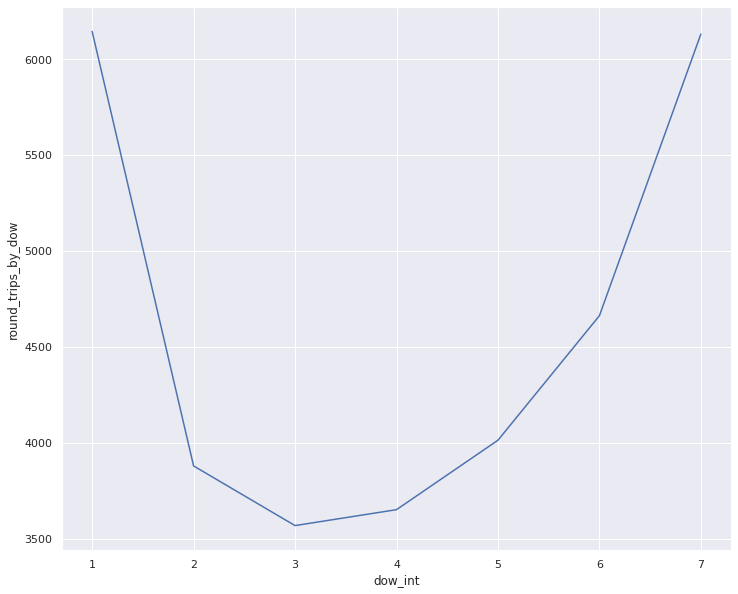

In [56]:
sns.lineplot(data = round_trips_by_dow, x = 'dow_int', y = 'round_trips_by_dow')

##### Significance of Train Stations

Shifting the discussion further, we can assume that there is also some connection between taking the train to get to work and subsequently taking a bike ride to get to the final work destination. If commuters had cars, there would be no need to take a train or bike. Also, taking a train to get to work usually isn't enough, as there usually is an additional walk and distance required to actually get to the workplace. If the distance is greater, people would want to resort to a bike to get there quicker. 


Based on the query for the question "How many of the stations are in close proximity to train stations?", there are 11 out of 84 distinct bike stations that are associated with train stations. Additionally, 42% of trips in our bikeshare_trips data has a train station as a start or end station, which is a fairly large percentage. We can possibly attribute many of these trips to be from subscribers. As a matter of fact, we did see that San Francisco Caltrain 2 is a common start station for subscribers. 

### So what is a commuter trip? 

Based on the information we have gathered above, the trends we saw, and the characteristics we've investigated, we can define a commuter trip to be as those with a starting time occurring between 7 am and 9 am for the morning since those are the times that work usually begins and people are leaving their homes to get to the workplace, or between 4 pm and 6 pm for the evening since those are times people will depart from work to go home. These trips will not be round trips, and they will be around the 5-20 minute range. They are also ones that periodically occur on weekdays, and either the starting station or ending station or both will be a train station. In addition, those who take commuter trips are subscribers. 

Using this information, let us run a query to find the most popular commuter trips:

In [67]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) as trips_by_stations FROM `bike_trip_data.commuter_trips` GROUP BY start_station_name, end_station_name ORDER BY trips_by_stations DESC LIMIT 5' > top_5_commuter_trips.csv

Waiting on bqjob_r3aef4b519b82c748_00000174e7cd2a0d_1 ... (1s) Current status: DONE   


In [68]:
pd.read_csv('top_5_commuter_trips.csv')

,start_station_name,end_station_name,trips_by_stations
0,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4692
1,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),4628
2,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),4479
3,Steuart at Market,San Francisco Caltrain (Townsend at 4th),4398
4,Market at 10th,San Francisco Caltrain 2 (330 Townsend),4061


'bike_trip_data.commuter_trips' was a view generated by this query, which contained all the where commands corresponding to my definition of a commuter trip: 

```sql
SELECT *
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE start_station_name <> end_station_name 
and duration_sec >= 300 and duration_sec <= 1200 
and (EXTRACT(DAYOFWEEK FROM start_date) <> 1 or EXTRACT(DAYOFWEEK FROM start_date) <> 7)
and (EXTRACT(HOUR FROM start_date) = 7 or EXTRACT(HOUR FROM start_date) = 8 or EXTRACT(HOUR FROM start_date) = 9 
      or EXTRACT(HOUR FROM start_date) = 16 or EXTRACT(HOUR FROM start_date) = 17 or EXTRACT(HOUR FROM start_date) = 18) 
and (start_station_name LIKE '%Caltrain%'
  OR start_station_name LIKE '%BART%'
  OR start_station_name LIKE '%Station%'
  OR end_station_name LIKE '%Caltrain%'
  OR end_station_name LIKE '%BART%'
  OR end_station_name LIKE '%Station%')
and subscriber_type = "Subscriber"
```

To get the 5 most popular commuter trips, I defined a trip in terms of its start and end station, which I grouped on to get the number of rows corresponding to that combination of start and end station. With the conditions/definitions of commuter trips applied, the top 5 commuter trips are 
```
1) Embarcadero at Folsom to San Francisco Caltrain (Townsend at 4th)
2) San Francisco Caltrain (Townsend at 4th) to Harry Bridges Plaza (Ferry Building)
3) Temporary Transbay Terminal (Howard at Beale) to San Francisco Caltrain (Townsend at 4th)
4) Steuart at Market to San Francisco Caltrain (Townsend at 4th)
5) Market at 10th to San Francisco Caltrain 2 (330 Townsend)
```

It is important to notice that the majority of trips involve the San Francisco Caltrain in some way. Therefore should expect the most commuter bike trips to occur between these station combinations.


#### Recommendations

From the above visualizations, it is clear that subscribers and commuter trips are the bulk of the business. I want to ensure that whatever offers or recommendations I suggest will not take away from them, but it would be interesting to take a look at areas where bike rides are fewer. 

For example, we can take a look at the number of trips by month and year: 

In [70]:
! bq query --use_legacy_sql=FALSE --format=csv 'WITH start_month_yr_extracted AS (SELECT *, EXTRACT(YEAR FROM start_date) AS start_year, EXTRACT(MONTH FROM start_date) AS start_month, CASE EXTRACT(MONTH FROM start_date) WHEN 1 THEN "January" WHEN 2 THEN "February" WHEN 3 THEN "March" WHEN 4 THEN "April" WHEN 5 THEN "May" WHEN 6 THEN "June" WHEN 7 THEN "July" WHEN 8 THEN "August" WHEN 9 THEN "September" WHEN 10 THEN "October" WHEN 11 THEN "November" WHEN 12 THEN "December" END AS start_month_str FROM `bigquery-public-data.san_francisco.bikeshare_trips` ORDER BY start_date ASC) SELECT start_year, start_month, count(*) as trips_by_month_and_year FROM start_month_yr_extracted GROUP by start_year, start_month ORDER by start_year, start_month ASC' > trips_by_month_yr.csv

Waiting on bqjob_r65f9a3433f95efcb_00000174e7daa0ba_1 ... (1s) Current status: DONE   


In [75]:
trips_by_month_yr = pd.read_csv("trips_by_month_yr.csv")
trips_by_month_yr.head()

,start_year,start_month,trips_by_month_and_year
0,2013,8,2102
1,2013,9,25243
2,2013,10,29105
3,2013,11,24219
4,2013,12,19894


<AxesSubplot:xlabel='start_month', ylabel='trips_by_month_and_year'>

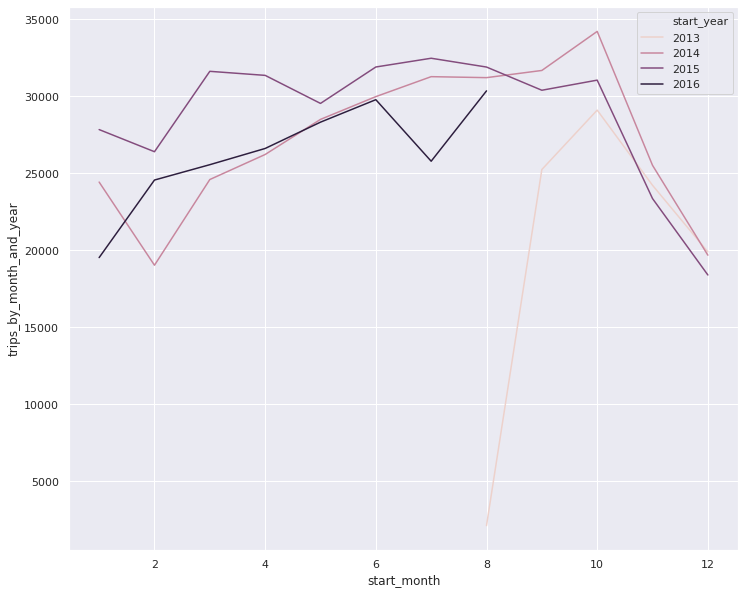

In [74]:
sns.lineplot(data = trips_by_month_yr, x = 'start_month', y = 'trips_by_month_and_year', hue = 'start_year')

##### Winter Discount

August 2013 had the least number of bike trips, with 2102 trips, while October 2014 had the most number of bike trips, with 34220 bike trips recorded. Overall within the months of May-October, we see the number of bike trips in the 30000 range, and in the months November, December, January, and February,we see fewer bike trips as they dwindle down in the 10000-20000 range, which isn't surprising because we should expect fewer people to ride bikes when it's colder outside.

We could invest in a potential business opportunity to increase ridership during the winter months. Even though it's highly unlikely that people will ride due to inclement weather, subscribers are more likely to still ride because of work obligations. For customers, we can decrease the price of a single ride to 1 dollar instead of 2 dollars during the months of December, January, and February. 

On holidays such as Christmas and Thanksgiving, which happen to also occur during the winter time, we can eliminate the 2 dollar unlock fee for customers, and overall reduce the ebike minute price by 5 cents.

##### Partnership with BART and Caltrain

Additionally, we saw above the relationship between train stations and bike rides for subscribers, as approximately 42% of all trips occurred at a train station. We could potentially have a partnership with the BART and Caltrain systems to promise subscribers a potential discount on their train passes provided they take a Lyft bike to work after taking the train. 



##### The Less Popular Stations

In addition, there appear to be instances where there are no bikes available for the common commuter hours, so we could potentially add more bikes to those impacted stations and reduce the number of docks at stations that aren't as popular for riders. Alternatively, to perhaps encourage ridership at stations that aren't so popular, we can have discounted ebike prices (perhaps 5-10 cents lower) if riders stop or start at less popular stations, and this could even encourage more appreciation and exploration of the areas surrounding those stations. 

##### Customer Discounts

We notice that the average duration for a customer bike ride is around 40 minutes. Currently, exceeding a 30 minute ride makes the ride more costly. Because customers are riding much longer than 30 minutes, perhaps increasing the limit to 45 minutes to even 1 hour could allow for customers to ride longer and relax without feeling limited by the 30 minute time constraint. 

##### Subscriber Rewards

We certainly want to show our appreciation for our subscribers, who contribute a lot to our business. We can introduce a reward system where for after every 100 minutes of riding, subscribers can get three days of free ebike rides, rather than having to pay 15 cents a minute for ebikes. This can motivate more and longer rides out of subscribers in the long term, and encourage them to ride outside of their commuting hours. 

#### Trends in Customer and Subscriber Rides

In [78]:
! bq query --use_legacy_sql=FALSE --format=csv 'select EXTRACT(YEAR FROM start_date) AS start_year, subscriber_type, count(*) as year_and_subscriber_type_count from `bigquery-public-data.san_francisco.bikeshare_trips` group by start_year, subscriber_type order by start_year, subscriber_type' > trip_yr_trends.csv


Waiting on bqjob_r3c2bc35ec2a27729_00000174e7f3b131_1 ... (0s) Current status: DONE   


In [86]:
trips_by_yr = pd.read_csv("trip_yr_trends.csv")

<AxesSubplot:xlabel='start_year', ylabel='year_and_subscriber_type_count'>

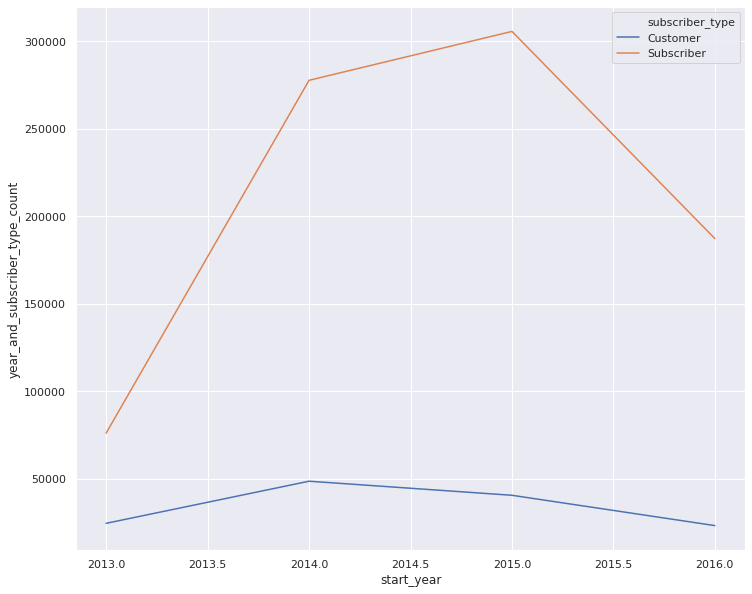

In [87]:
sns.lineplot(data = trips_by_yr, x = 'start_year', y = 'year_and_subscriber_type_count', hue = 'subscriber_type')

Based on the lineplots above, for customer trips, we see an increase in trips from 2013 to 2014, but after 2014, we see nothing but decreases. For subscriber trips, there were 76064 of them in 2013. We see a significant increase from 2013 to 2014. We see another steady increase in 2015, but the number of trips declines in 2016. 

To deal with the issue of reduction in customer and subscriber trips, perhaps it would be useful to re-evaluate the pricing of trips per minute. 



##### Introduce a Dockless System

Another major issue is that riders are expected to drop off their bikes at designated docks after their trip, which could've possibly resulted in the drops in trips over the years. Due to the constraints of 30 minute rides for customers, there is an intense pressure to have to find the nearest bike station and drop their bike off without having to pay extra money. Moreover, the drop off process involves needing docks available to properly park the bike after usage. 

Perhaps, we can introduce a dockless system where after a trip, the bike can be dropped anywhere on a sidewalk, especially because there could be issues where a dock area is completely occupied and riders will have to pay extra money for being unable to park their bike properly. This alternative could make bikes easier to find and there is less pressure and rush to have to park. 